# CS 422: Machine Learning - K Means Clutering

### CS - 4201

#### Libraries

> Be sure to have these libraries installed 

- matplotlib 
- numpy
- pandas

#### Leader

- Magbojos, Jenloke 

#### Members

- Javier, April Kate
- Kalalo, Febrj Yarrah
- Labay, Caryll
- Mendaña, Mark Yvan
- Mendoza, Kata Trixie
- Millena, Jericho James

In [1]:
#Here is where we import the libraries we will need for this assignment.
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import random

# Keeps the same random each time
random.seed('spearhead')

#To reduce memory usage, we enable copy-on-write mode to avoid making unnecessary copies of the dataframe.
pd.options.mode.copy_on_write = True

In [2]:
#Now, we load the dataset in a dataframe named "data_table".
data_table = pd.read_csv('Mall_Customers.csv')

#Here, we just display the metadata (column header, missing values, data type) of the dataset:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
#We remove data with null values and adjust the index of the dataset.
adjusted_dataset = data_table.dropna()
adjusted_dataset = adjusted_dataset.reset_index(drop=True)

#Here, we just display the metadata (column header, missing values, data type) of the dataset:
adjusted_dataset.info()

#We see that there are no data with missing values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Here, we select these two features to use for K Means Clustering.
feature1='annual_income'
feature2='spending_score'

#Then, we create a dataframe containing only these two features.
k_mean_df = adjusted_dataset[[feature1, feature2]]

<Figure size 640x480 with 0 Axes>

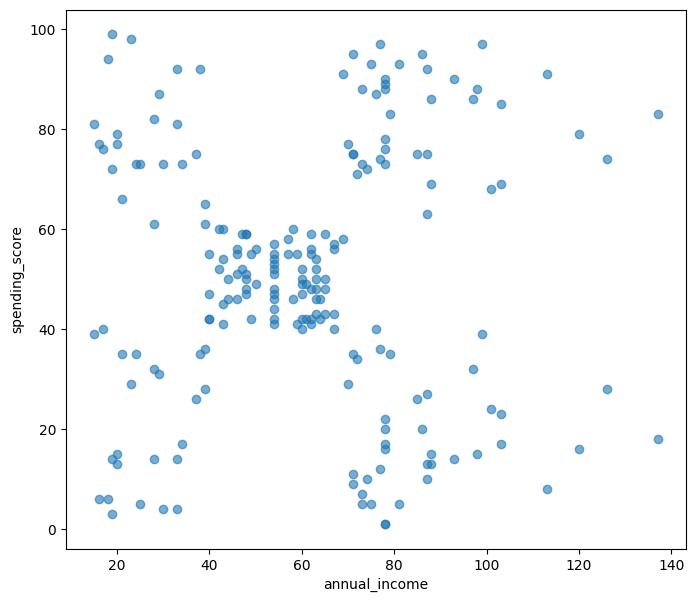

In [5]:
#Here, we visualize the original state of the dataset with a scatter plot having two features.
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(k_mean_df[feature1], k_mean_df[feature2], alpha=0.6)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [6]:
# Helper Functions

#Here is the function to plot centroids in random positions (as an initial guess).
def randompoint(feature):
	min = k_mean_df[feature].min()
	max = k_mean_df[feature].max()
	return random.randint(min.astype(np.int64), max.astype(np.int64))

#This is how we compute for the distances of the datapoints to the centroids using the Euclidean distance formula where we take the positive values (that's why the values are squared)
def compute_distances(df, centroids):
	distances = []
	for x in range(df.shape[0]):
		point = [df.iloc[x][feature1], df.iloc[x][feature2]]
		point_distances = []
		for centroid in centroids:
			distance = ((point[0] - centroid[0]) ** 2 + (point[1] - centroid[1]) ** 2) ** 0.5
			point_distances.append(distance)
		distances.append(point_distances)
	return np.array(distances)



Number of centroids =  1
Iteration Counter =  1
WCSS in this iteration =  6381.39857844765


<Figure size 640x480 with 0 Axes>

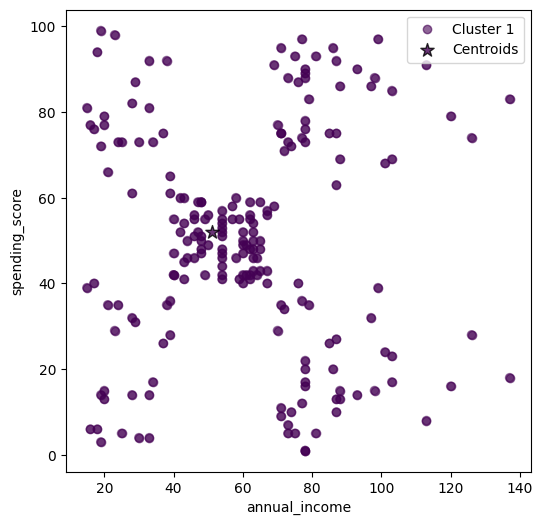

Iteration Counter =  2
WCSS in this iteration =  6223.912932356548


<Figure size 640x480 with 0 Axes>

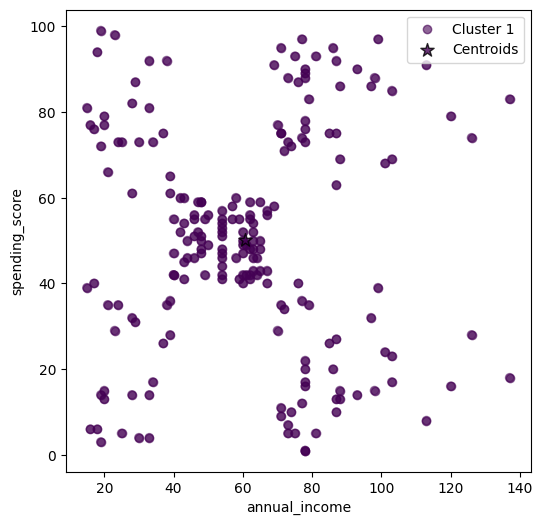

Iteration Counter =  3
WCSS in this iteration =  6223.912932356548


<Figure size 640x480 with 0 Axes>

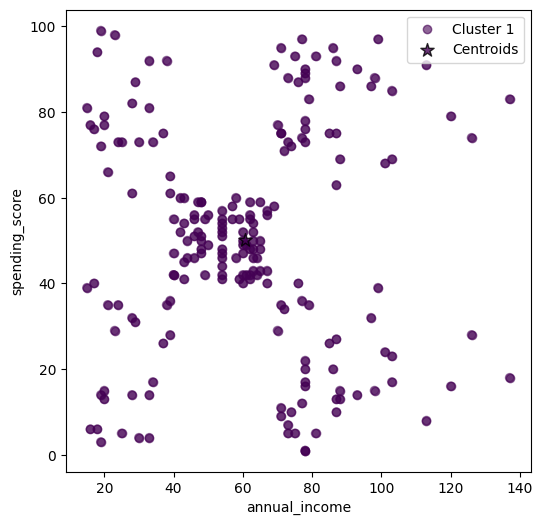


WCSS in this iteration =  6223.912932356548
Cluster Assignment after the iteration:
                   annual_income  spending_score
nearest_centroids                               
0.0                          200             200

Final WCSS for this k Cluster =  6223.912932356548 

Final Cluster Assignment from the Converged K Means: 
                   annual_income  spending_score
nearest_centroids                               
0.0                          200             200


Number of centroids =  2
Iteration Counter =  1
WCSS in this iteration =  7183.204485179737


<Figure size 640x480 with 0 Axes>

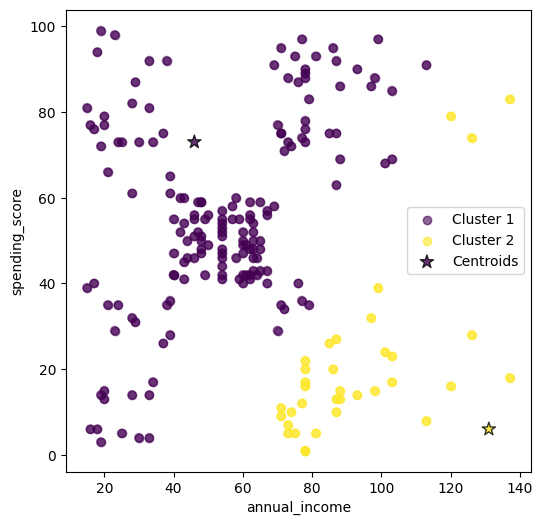

Iteration Counter =  2
WCSS in this iteration =  5106.964366923744


<Figure size 640x480 with 0 Axes>

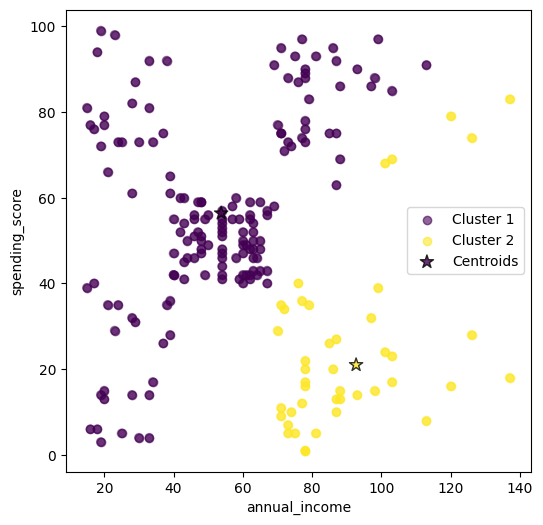

Iteration Counter =  3
WCSS in this iteration =  5124.431597068054


<Figure size 640x480 with 0 Axes>

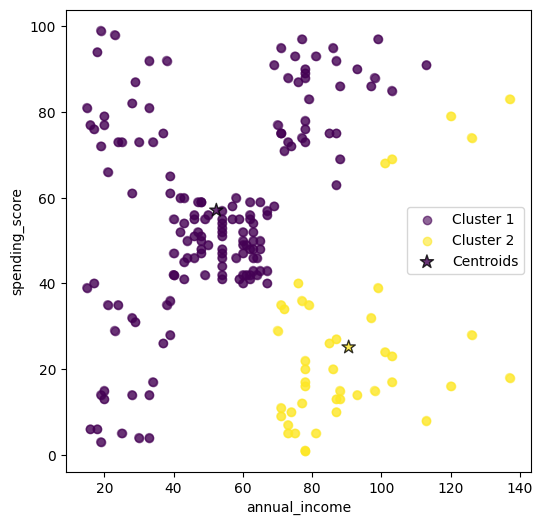

Iteration Counter =  4
WCSS in this iteration =  5124.431597068054


<Figure size 640x480 with 0 Axes>

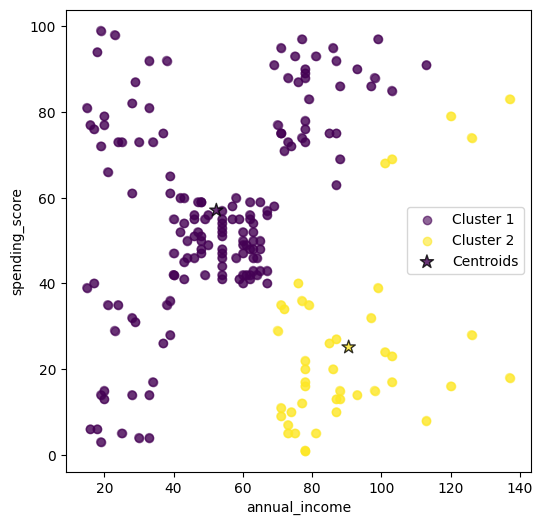


WCSS in this iteration =  5124.431597068054
Cluster Assignment after the iteration:
                   annual_income  spending_score
nearest_centroids                               
0.0                          157             157
1.0                           43              43

Final WCSS for this k Cluster =  5124.431597068054 

Final Cluster Assignment from the Converged K Means: 
                   annual_income  spending_score
nearest_centroids                               
0.0                          157             157
1.0                           43              43


Number of centroids =  3
Iteration Counter =  1
WCSS in this iteration =  6871.0232929183785


<Figure size 640x480 with 0 Axes>

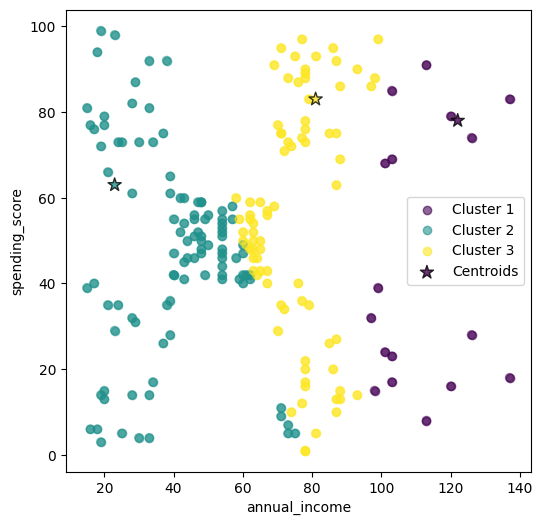

Iteration Counter =  2
WCSS in this iteration =  5002.998919115659


<Figure size 640x480 with 0 Axes>

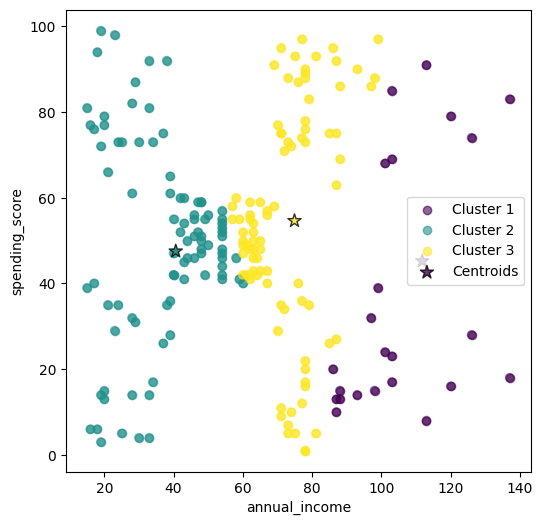

Iteration Counter =  3
WCSS in this iteration =  4838.646871240594


<Figure size 640x480 with 0 Axes>

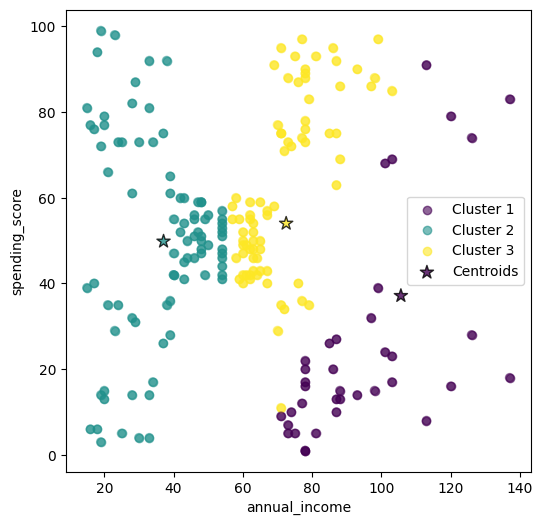

Iteration Counter =  4
WCSS in this iteration =  4449.584520091561


<Figure size 640x480 with 0 Axes>

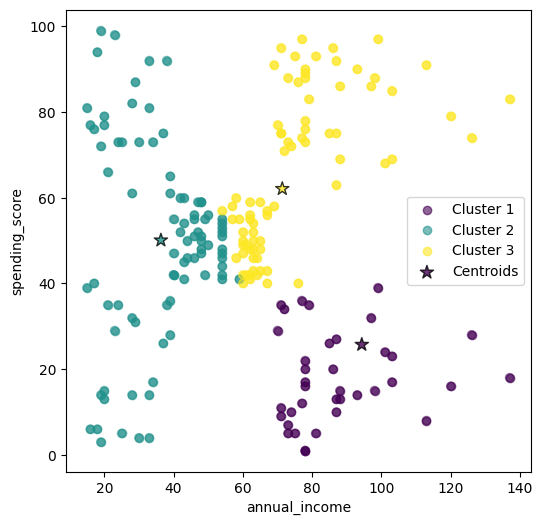

Iteration Counter =  5
WCSS in this iteration =  4315.4846019798315


<Figure size 640x480 with 0 Axes>

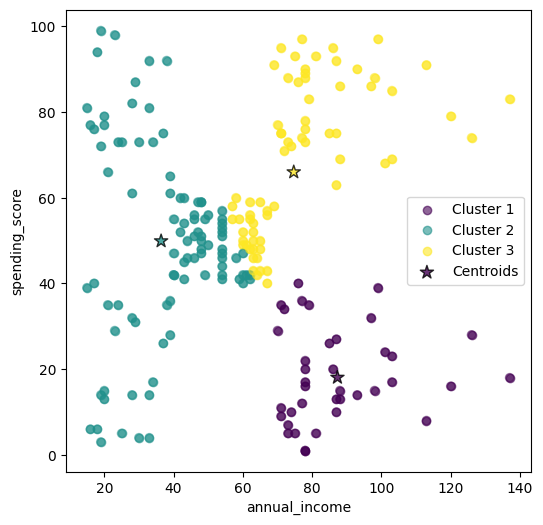

Iteration Counter =  6
WCSS in this iteration =  4225.4769717341005


<Figure size 640x480 with 0 Axes>

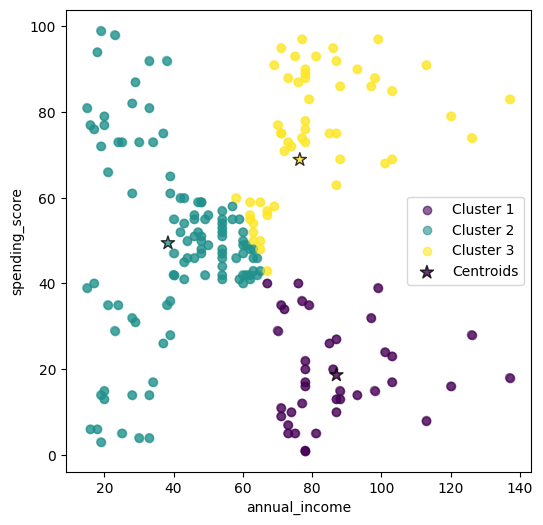

Iteration Counter =  7
WCSS in this iteration =  4016.0582901692133


<Figure size 640x480 with 0 Axes>

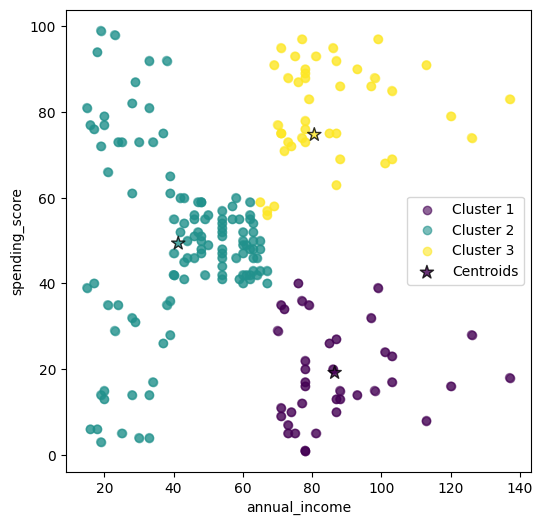

Iteration Counter =  8
WCSS in this iteration =  3919.697725580987


<Figure size 640x480 with 0 Axes>

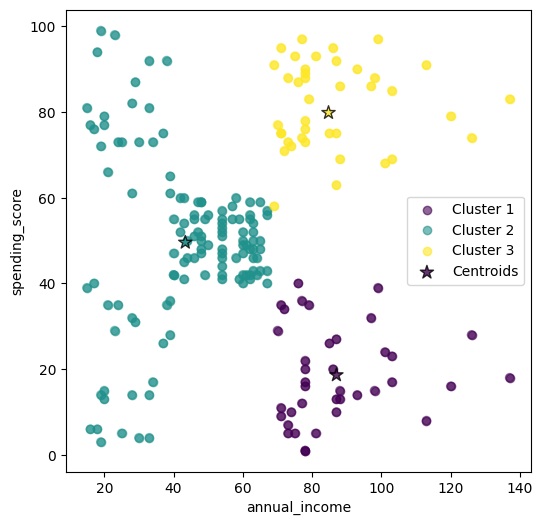

Iteration Counter =  9
WCSS in this iteration =  3903.7323550002275


<Figure size 640x480 with 0 Axes>

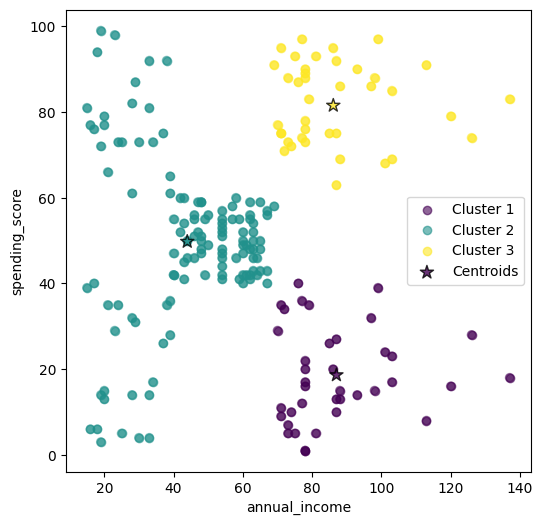

Iteration Counter =  10
WCSS in this iteration =  3899.705512700313


<Figure size 640x480 with 0 Axes>

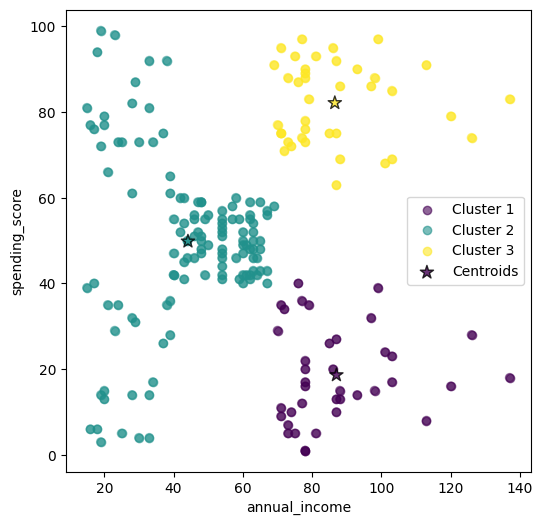

Iteration Counter =  11
WCSS in this iteration =  3899.705512700313


<Figure size 640x480 with 0 Axes>

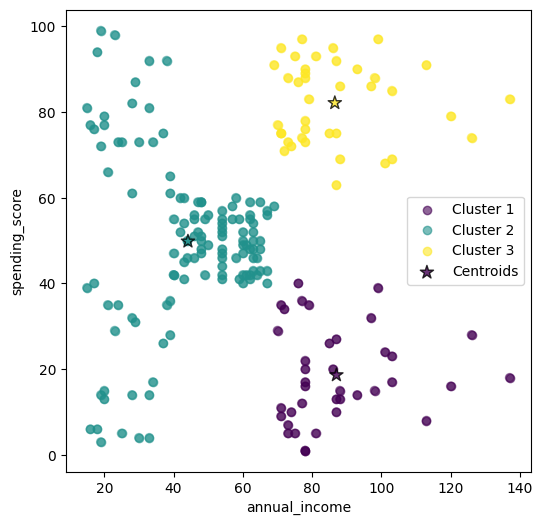


WCSS in this iteration =  3899.705512700313
Cluster Assignment after the iteration:
                   annual_income  spending_score
nearest_centroids                               
0.0                           38              38
1.0                          123             123
2.0                           39              39

Final WCSS for this k Cluster =  3899.705512700313 

Final Cluster Assignment from the Converged K Means: 
                   annual_income  spending_score
nearest_centroids                               
0.0                           38              38
1.0                          123             123
2.0                           39              39


Number of centroids =  4
Iteration Counter =  1
WCSS in this iteration =  4966.963351044997


<Figure size 640x480 with 0 Axes>

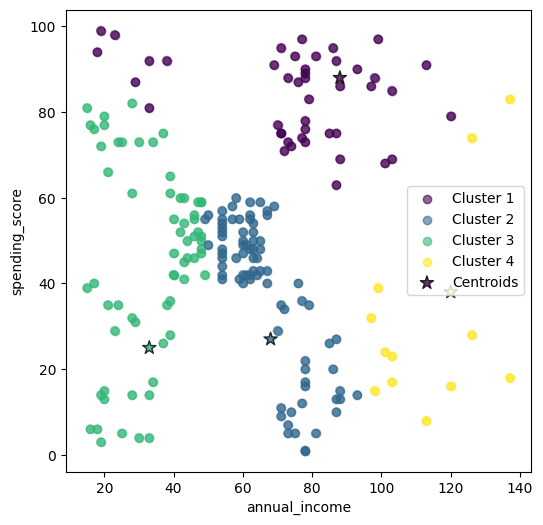

Iteration Counter =  2
WCSS in this iteration =  4019.082806479549


<Figure size 640x480 with 0 Axes>

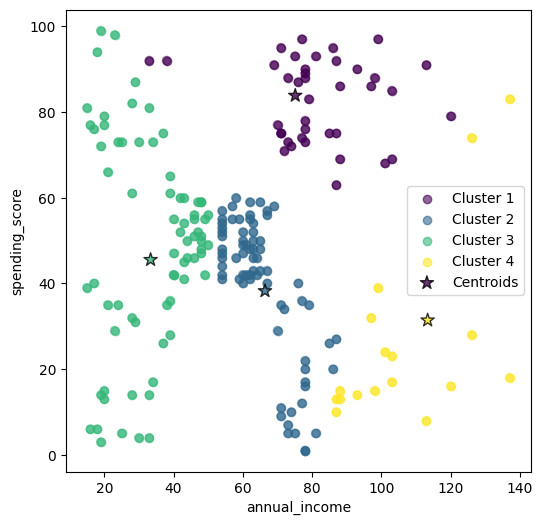

Iteration Counter =  3
WCSS in this iteration =  3821.7771387290477


<Figure size 640x480 with 0 Axes>

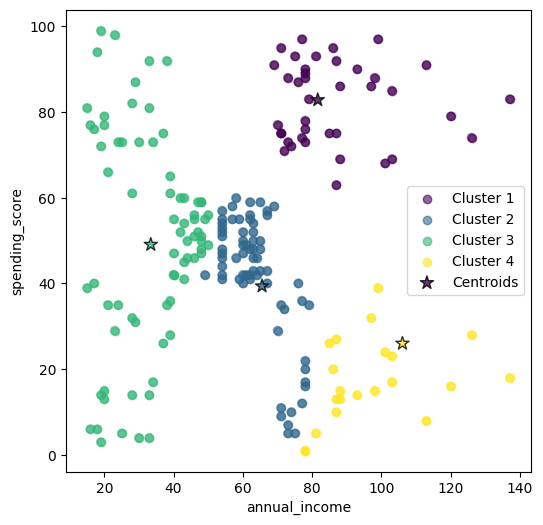

Iteration Counter =  4
WCSS in this iteration =  3568.6887441757426


<Figure size 640x480 with 0 Axes>

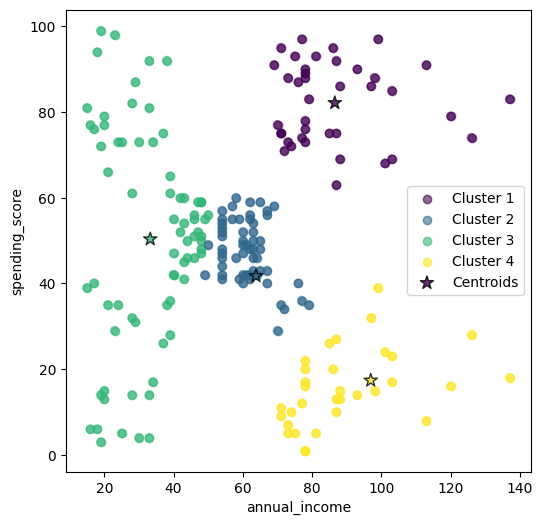

Iteration Counter =  5
WCSS in this iteration =  3370.0272155730963


<Figure size 640x480 with 0 Axes>

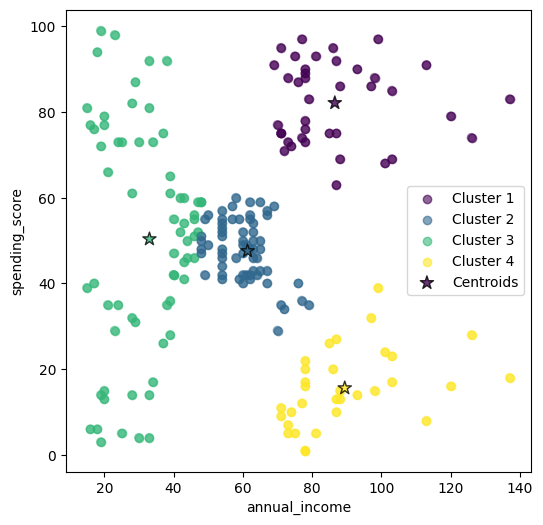

Iteration Counter =  6
WCSS in this iteration =  3368.3567809448987


<Figure size 640x480 with 0 Axes>

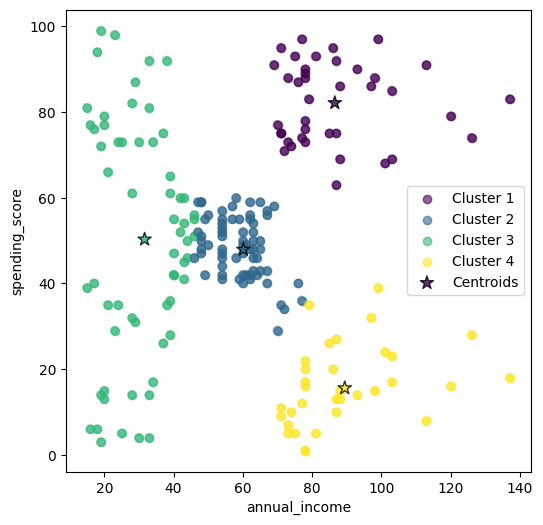

Iteration Counter =  7
WCSS in this iteration =  3365.2260552391626


<Figure size 640x480 with 0 Axes>

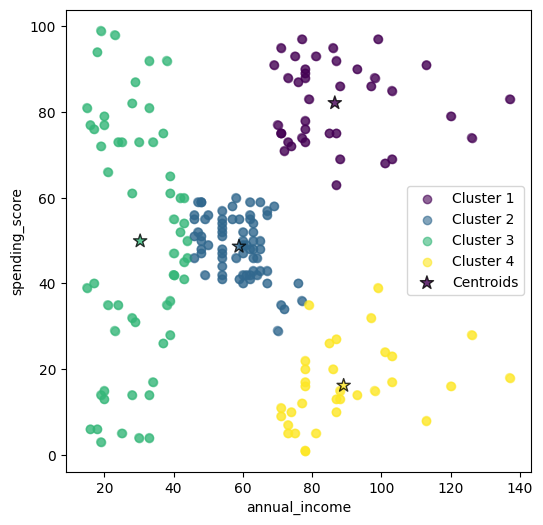

Iteration Counter =  8
WCSS in this iteration =  3369.266724650346


<Figure size 640x480 with 0 Axes>

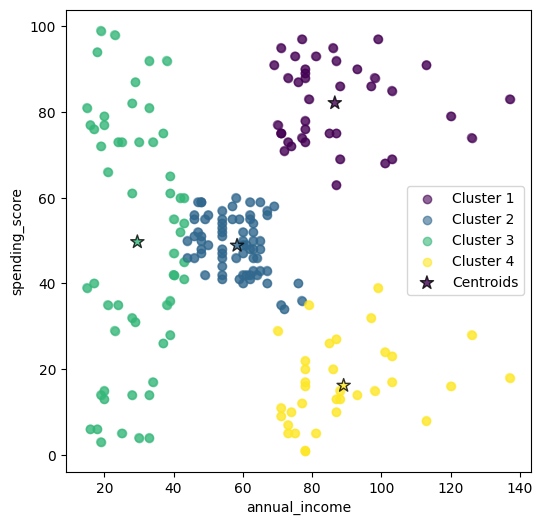

Iteration Counter =  9
WCSS in this iteration =  3368.231195959017


<Figure size 640x480 with 0 Axes>

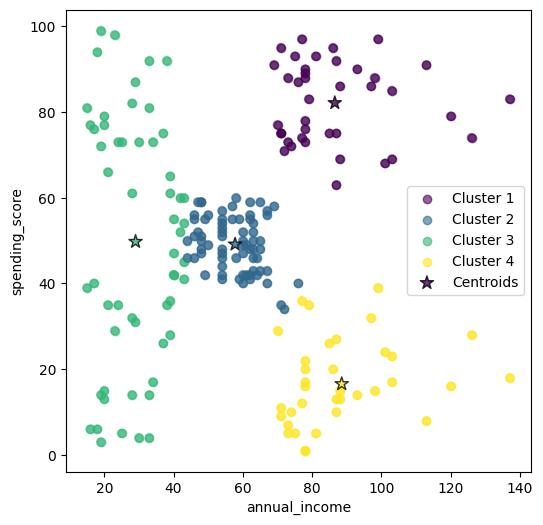

Iteration Counter =  10
WCSS in this iteration =  3367.7389937701055


<Figure size 640x480 with 0 Axes>

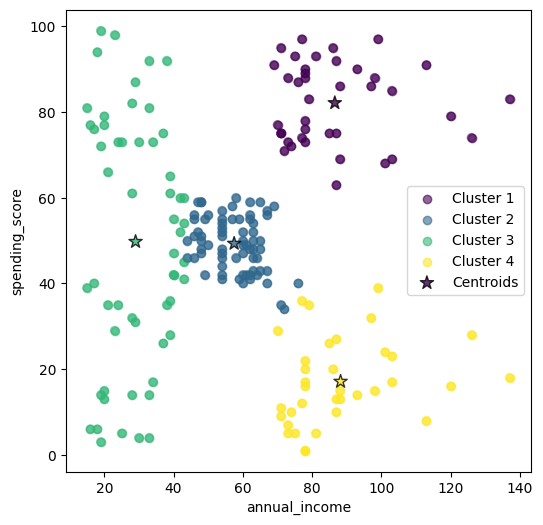

Iteration Counter =  11
WCSS in this iteration =  3367.7389937701055


<Figure size 640x480 with 0 Axes>

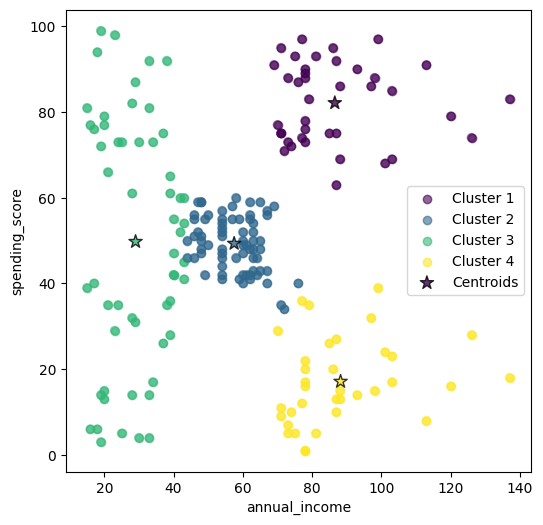


WCSS in this iteration =  3367.7389937701055
Cluster Assignment after the iteration:
                   annual_income  spending_score
nearest_centroids                               
0.0                           39              39
1.0                           70              70
2.0                           56              56
3.0                           35              35

Final WCSS for this k Cluster =  3367.7389937701055 

Final Cluster Assignment from the Converged K Means: 
                   annual_income  spending_score
nearest_centroids                               
0.0                           39              39
1.0                           70              70
2.0                           56              56
3.0                           35              35


Number of centroids =  5
Iteration Counter =  1
WCSS in this iteration =  5091.530731131796


<Figure size 640x480 with 0 Axes>

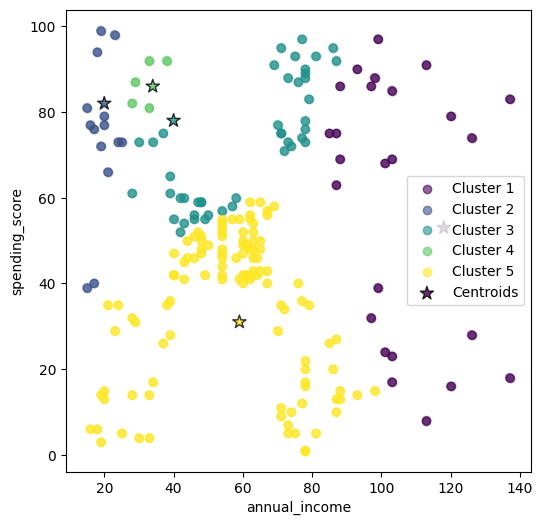

Iteration Counter =  2
WCSS in this iteration =  4345.121825832886


<Figure size 640x480 with 0 Axes>

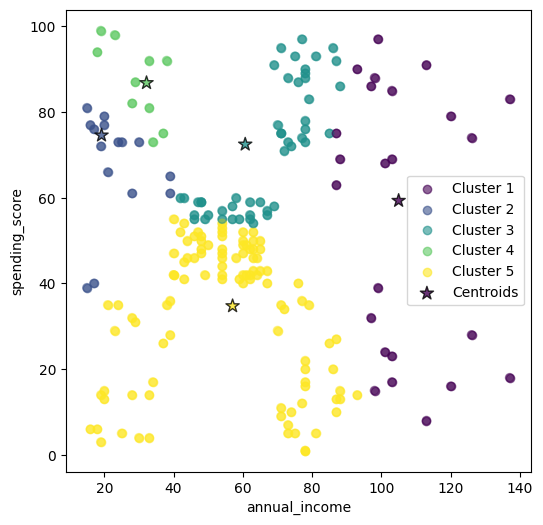

Iteration Counter =  3
WCSS in this iteration =  4284.479300157322


<Figure size 640x480 with 0 Axes>

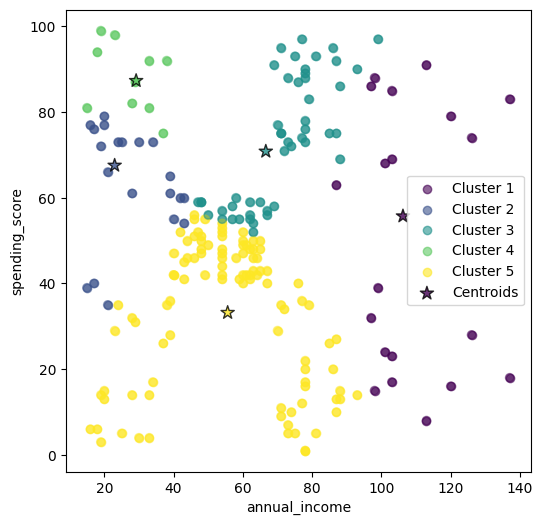

Iteration Counter =  4
WCSS in this iteration =  4150.571263571675


<Figure size 640x480 with 0 Axes>

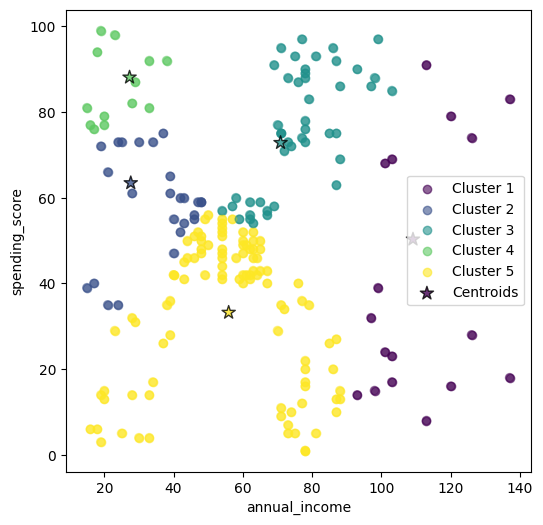

Iteration Counter =  5
WCSS in this iteration =  3884.8000238710783


<Figure size 640x480 with 0 Axes>

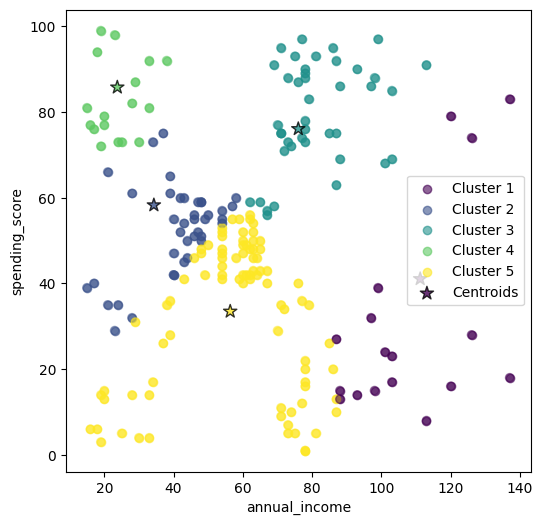

Iteration Counter =  6
WCSS in this iteration =  3503.1898505740965


<Figure size 640x480 with 0 Axes>

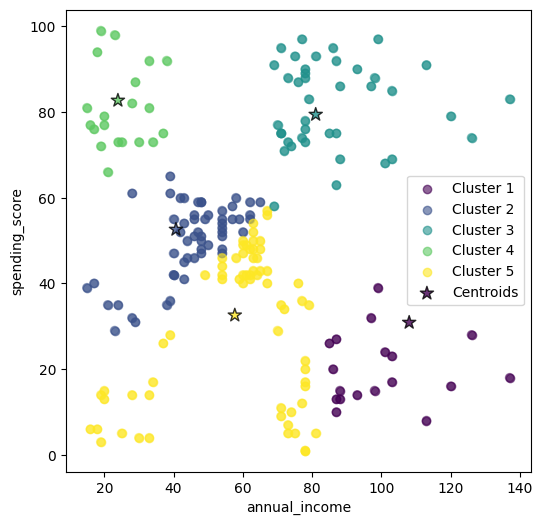

Iteration Counter =  7
WCSS in this iteration =  3249.4652422408626


<Figure size 640x480 with 0 Axes>

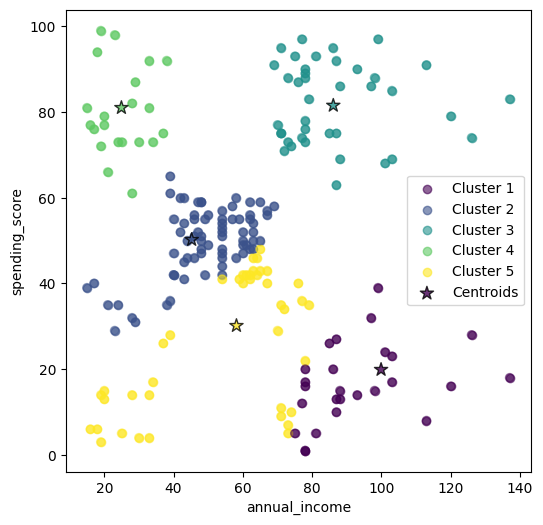

Iteration Counter =  8
WCSS in this iteration =  3070.9908959779304


<Figure size 640x480 with 0 Axes>

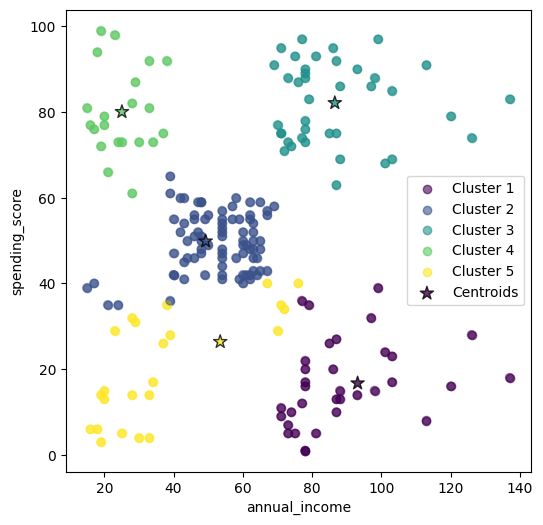

Iteration Counter =  9
WCSS in this iteration =  2694.9107417236273


<Figure size 640x480 with 0 Axes>

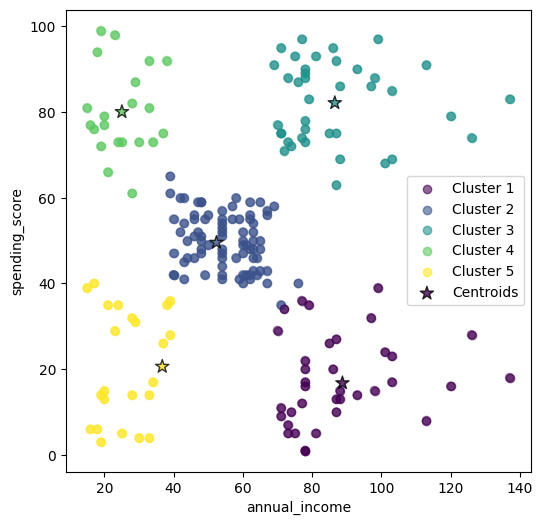

Iteration Counter =  10
WCSS in this iteration =  2604.503594323566


<Figure size 640x480 with 0 Axes>

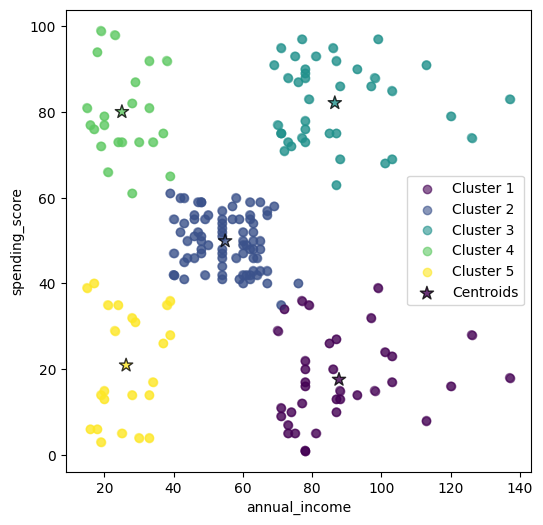

Iteration Counter =  11
WCSS in this iteration =  2602.9725788386436


<Figure size 640x480 with 0 Axes>

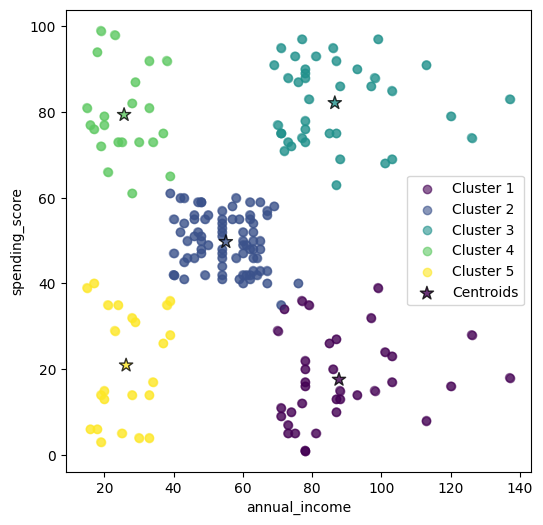

Iteration Counter =  12
WCSS in this iteration =  2602.9725788386436


<Figure size 640x480 with 0 Axes>

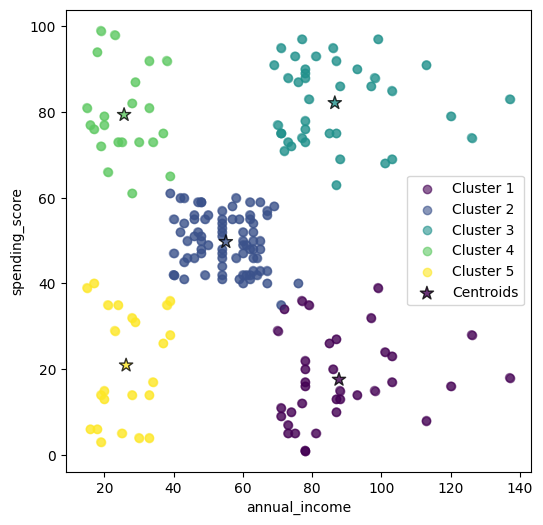


WCSS in this iteration =  2602.9725788386436
Cluster Assignment after the iteration:
                   annual_income  spending_score
nearest_centroids                               
0.0                           36              36
1.0                           80              80
2.0                           39              39
3.0                           22              22
4.0                           23              23

Final WCSS for this k Cluster =  2602.9725788386436 

Final Cluster Assignment from the Converged K Means: 
                   annual_income  spending_score
nearest_centroids                               
0.0                           36              36
1.0                           80              80
2.0                           39              39
3.0                           22              22
4.0                           23              23

Final WCSS for all k Clusters tested:  [6223.91293236 5124.43159707 3899.7055127  3367.73899377 2602.97257884]


In [7]:
#Here is a loop for our k means clustering algorithm
wcss = np.array([])

first_centroid = 1
last_centroid = 5

for k in range(first_centroid, last_centroid+1):
	print('\n\nNumber of centroids = ', k)
	number_centroids = k
	centroids = np.array([[randompoint(feature1), randompoint(feature2)] for _ in range(number_centroids)])

	before_wcss = 0

	itr = 1
	while (True):
		print('Iteration Counter = ', itr)

		distances_centroids = compute_distances(k_mean_df, centroids)

		#Then, we assign the datapoint to the nearest centroid based from its distance values towards the centroids.
		# - np.argmin(x) finds the index of the nearest centroid for each point.
		# - np.min(x) retrieves the corresponding minimum distance value.
		index_centroids = np.array([[np.argmin(x), np.min(x)] for x in distances_centroids])

		#We store the assignment of the clusters for each datapoint.
		k_mean_df['nearest_centroids'] = index_centroids[:, 0]

		#Then, we store the distances for computing WCSS (Within-Cluster Sum of Squares) later
		current_wcss = index_centroids[:, 1].sum()
		print('WCSS in this iteration = ', current_wcss)

		#For Visualization
		fig = plt.figure()
		fig, ax = plt.subplots(figsize=(6,6))

		colors = plt.cm.viridis(np.linspace(0, 1, number_centroids))
		for i, color in enumerate(colors):
			cluster_points = k_mean_df[k_mean_df['nearest_centroids'] == i]
			ax.scatter(cluster_points[feature1], cluster_points[feature2], color=color, alpha=0.6, label=f'Cluster {i+1}')

		ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='viridis', alpha=0.5)
		centroid_x = centroids[:, 0]
		centroid_y = centroids[:, 1]
		ax.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='viridis', marker='*', edgecolors='black', linewidth=1, s=100, label='Centroids', alpha=0.8)
		ax.set_xlabel(feature1)
		ax.set_ylabel(feature2)
		ax.legend()
		plt.show()
		plt.close(fig)

		#New centroids are plotted, by again getting the average or mean
		new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
		centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])

		#Go to next iteration
		itr+=1

		#Stop iteration if the values of WCSS has not changed from the previous iteration
		#If WCSS remains the same, it means the centroids have stabilized, so we may now stop looping.
		if (before_wcss == current_wcss):
			print('\nWCSS in this iteration = ', current_wcss)
			wcss = np.append(wcss, current_wcss)
			break
		before_wcss = current_wcss

	#Here is where we print cluster assignments
	print('Cluster Assignment after the iteration:')
	print(k_mean_df.groupby(by=['nearest_centroids']).count())
	
	print('\nFinal WCSS for this k Cluster = ', before_wcss, '\n')

	print('Final Cluster Assignment from the Converged K Means: ')
	print(k_mean_df.groupby(by=['nearest_centroids']).count())

print('\nFinal WCSS for all k Clusters tested: ', wcss)


[6223.91293236 5124.43159707 3899.7055127  3367.73899377 2602.97257884]


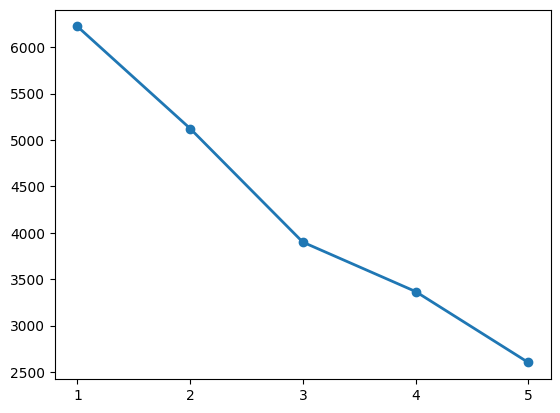

In [8]:
#Plot the Elbow Method Graph
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

len_wcss = [i+1 for i in range(len(wcss))]

print(wcss)

ax.plot(len_wcss, wcss, 'o-', linewidth=2)

plt.show()